# Were the Etruscan people native to Italy?

## Notes

### Data

- Data consists of 154 observations of male skull breadths
  - Modern Italian males used as substitute for ancient Italian males
- Data fields:
  - **type** `str` : origin of skull, Etruscan or Italian
  - **size** `float` : skull breadth (mm)

### Method

- Given data is biological, reasonable to suppose that it can modelled
  normally
  - Normality of samples checked using a frequency histogram and normal
    probability plot
- Mean and 95% **t**-interval returned both samples
- Mean difference and 95% **t**-interval of the mean difference
  returned
- Checked assumption of common population variance
- Performed **t**-test: mean skull breadth of the Etruscan skulls is
  equal to that of the Italian skulls

### Reference

m248.b.act22

-----

## Full Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import statsmodels.stats.weightstats as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load, describe, summarise  # noqa: E402

### Import the data

In [4]:
# get data
skulls: pd.DataFrame = load.Data.get("skulls")

In [5]:
# preview data
skulls.head()

,type,size
0,Etruscan,141
1,Etruscan,148
2,Etruscan,132
3,Etruscan,138
4,Etruscan,154


In [6]:
# check dtypes
skulls.dtypes

type    object
size     int64
dtype: object

In [7]:
# get samples as series
etr: pd.Series = skulls.query('type == "Etruscan"')["size"]
ita: pd.Series = skulls.query('type == "Italian"')["size"]

### Visualise the data

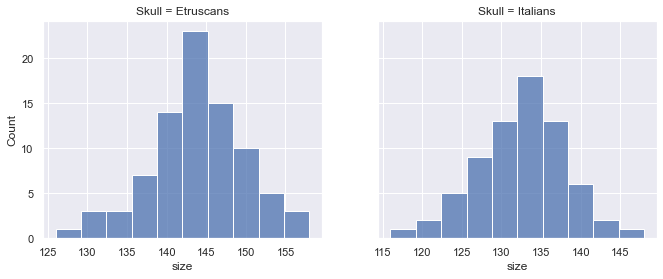

In [8]:
# frequency histograms
f, axs = plt.subplots(ncols=2, sharey=True, figsize=(11, 4))
sns.histplot(x=etr, bins=10, ax=axs[0])
sns.histplot(x=ita, bins=10, ax=axs[1])
axs[0].set(title="Skull = Etruscans")
axs[1].set(title="Skull = Italians")
plt.show()

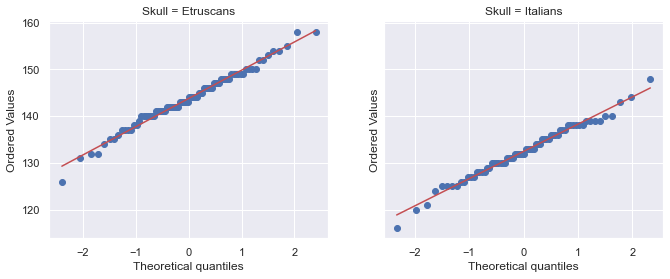

In [9]:
# probability plots
f, axs = plt.subplots(ncols=2, sharey=True, figsize=(11, 4))
stats.probplot(x=etr, plot=axs[0])
stats.probplot(x=ita, plot=axs[1])
axs[0].set(title="Skull = Etruscans")
axs[1].set(title="Skull = Italians")
plt.show()

### Analyse the data

In [10]:
# initialise CompareMeans object
ttest: sm.CompareMeans = sm.CompareMeans.from_data(data1=etr, data2=ita)

In [11]:
# check for common population variance. Expect < 3
max(ttest.d1.var / ttest.d2.var, ttest.d2.var / ttest.d1.var) < 3

True

In [12]:
describe.TSample(
    "Etruscans", ttest.d1.nobs, ttest.d1.mean, ttest.d1.tconfint_mean())

Etruscans(size=84, mean=143.773810, tconfint_mean=(142.478129, 145.069490))

In [13]:
describe.TSample(
    "Italians", ttest.d2.nobs, ttest.d2.mean, ttest.d2.tconfint_mean())

Italians(size=70, mean=132.442857, tconfint_mean=(131.071830, 133.813884))

In [14]:
describe.TDiff(
    ttest.d1.mean - ttest.d2.mean, ttest.tconfint_diff())

Difference(mean_diff=11.330952, tconfint_diff=(9.453650, 13.208254))

In [15]:
# run the test
tstat, pval, dof = ttest.ttest_ind()
summarise.TTest(tstat, pval, dof)

ResultSummary(tstat=11.924823, pval=0.000000, dof=152)